In [1]:
%load_ext autoreload
%autoreload 2

Here is a breakdown of the concepts from the lecture slides on Parametric Regression and how they translate to code.

### 1. Recap: Gaussian Distributions

The lecture starts with a recap of key Gaussian distribution properties essential for probabilistic inference with linear models:

* Products of Gaussians are Gaussians:
    $$
    \mathcal{N}(x;a,A)\mathcal{N}(x;b,B)=\mathcal{N}(x;c,C)\mathcal{N}(a;b,A+B)
    $$
    where $C:=(A^{-1}+B^{-1})^{-1}$ and $c:=C(A^{-1}a+B^{-1}b)$.

* Linear projections of Gaussians are Gaussians:
    If 
    $$
    p(z)=\mathcal{N}(z;\mu,\Sigma)
    $$, then 
    $$
    p(Az)=\mathcal{N}(Az,A\mu,A\Sigma A^{T})
    $$.

* Marginals of Gaussians are Gaussians:
    $$
    \int\mathcal{N}\left(\begin{bmatrix}x\\ y\end{bmatrix}; \begin{bmatrix}\mu_{x}\\ \mu_{y}\end{bmatrix}, \begin{bmatrix}\Sigma_{xx}&\Sigma_{xy}\\ \Sigma_{yx}&\Sigma_{yy}\end{bmatrix}\right)dy=\mathcal{N}(x;\mu_{x},\Sigma_{xx})
    $$

* Linear conditionals of Gaussians are Gaussians:
    $$
    p(x|y)=\frac{p(x,y)}{p(y)}=\mathcal{N}(x;\mu_{x}+\Sigma_{xy}\Sigma_{yy}^{-1}(y-\mu_{y}),\Sigma_{xx}-\Sigma_{xy}\Sigma_{yy}^{-1}\Sigma_{yx})
    $$

These properties ensure that with a Gaussian prior and Gaussian noise in a linear model, the posterior distributions remain Gaussian and analytically computable.



### 2. Supervised Regression

The problem is to learn a function $f(x)$ from data $(x_i, y_i)$.

 The probabilistic formulation assumes the data is generated by:
$y = f(x) + \epsilon$
where $\epsilon$ is typically assumed to be Gaussian noise.
The likelihood is given as:
$$
p(y|f)=\mathcal{N}(y;f(x),\sigma^{2}I_{N})
$$
We want to infer $f$.



### 3. A Linear Model

We assume a parametric form for $f(x)$.

The slides use a simple linear function:
$f(x) = w_1 + w_2x$

This can be written using a feature vector $\phi(x)$ and weight vector $w$:
$$f(x) = \phi_x^T w$$
where $$w = \begin{bmatrix} w_1 \\ w_2 \end{bmatrix}$$ and $$\phi(x) = \begin{bmatrix} 1 \\ x \end{bmatrix} =: \phi_x$$


### 4. Gaussian Inference in Weight and Function Space

Now we combine our Gaussian assumptions with the linear model.  

We place a Gaussian prior distribution over the weights $w$:

$$
p(w) = \mathcal{N}(w; \mu, \Sigma)
$$

Here, $\mu$ is the prior mean vector for the weights, and $\Sigma$ is the prior covariance matrix.  
This prior represents our beliefs about the weights before observing any data.

Using the property of linear projections, the prior distribution over the function value $f(x)$ at a specific input $x$ is also Gaussian:

$$
p(f_x) = p(\phi(x)^T w) = \mathcal{N}(f_x; \phi(x)^T \mu, \phi(x)^T \Sigma \phi(x))
$$

Given a dataset of inputs $X = [x_1, \ldots, x_N]^T$ and corresponding outputs $y = [y_1, \ldots, y_N]^T$,  we can form a feature matrix $\Phi_X$ where each row is $\phi(x_i)^T$.  

**The likelihood of the data $y$ given the weights $w$ is:**

$$
p(y \mid w, \Phi_X) = \mathcal{N}(y; \Phi_X w, \sigma^2 I)
$$

Note: The slides use $\phi_X$ with columns as feature vectors, leading to $\phi_X^T w$.  
We'll stick to the more common convention of rows as feature vectors, so the linear model becomes $\Phi_X w$.  
The formulas will adjust accordingly.

By Bayes' theorem, the posterior distribution over the weights $w$ given the data $(X, y)$ is proportional to the prior times the likelihood:

$$
p(w \mid y, \Phi_X) \propto p(y \mid w, \Phi_X) p(w)
$$

Since both the prior and likelihood are Gaussian and the relationship is linear, the posterior distribution $p(w \mid y, \Phi_X)$ is also Gaussian, $\mathcal{N}(w; \mu_{\text{post}}, \Sigma_{\text{post}})$.  

The parameters of the posterior can be derived using the Gaussian properties.  
The slides provide two equivalent forms; we'll use the second form which is often more numerically stable:

**Posterior mean of weights:**

$$
\mu_{\text{post}} = (\Sigma^{-1} + \sigma^{-2} \Phi_X^T \Phi_X)^{-1} (\Sigma^{-1} \mu + \sigma^{-2} \Phi_X^T y)
$$

**Posterior covariance of weights:**

$$
\Sigma_{\text{post}} = (\Sigma^{-1} + \sigma^{-2} \Phi_X^T \Phi_X)^{-1}
$$

Similarly, the posterior distribution over the function value $f(x^*)$ at a new input $x^*$, given the training data $(X, y)$, is also Gaussian.  
Let $\phi(x^*)$ be the feature vector for the new input.  


**The predictive distribution** for the function value is $$p(f(x) \mid y, \Phi_X) = \mathcal{N}(f(x); \mu_{f|y}, \Sigma_{f|y})$$.  
The parameters are:

**Predictive mean of function value:**

$$
\mu_{f|y} = \phi(x)^T \mu_{\text{post}} = \phi(x)^T (\Sigma^{-1} + \sigma^{-2} \Phi_X^T \Phi_X)^{-1} (\Sigma^{-1} \mu + \sigma^{-2} \Phi_X^T y)
$$

**Predictive covariance of function value:**

$$
\Sigma_{f|y} = \phi(x)^T \Sigma_{\text{post}} \phi(x) = \phi(x)^T (\Sigma^{-1} + \sigma^{-2} \Phi_X^T \Phi_X)^{-1} \phi(x)
$$

If we want the predictive distribution for a new observation $y^*$ at input $x^*$, we need to include the noise variance $\sigma^2$:

$$
p(y^* \mid y, \Phi_X) = \mathcal{N}(y^*; \mu_{f|y}, \Sigma_{f|y} + \sigma^2)
$$

The mean remains the same, but the variance increases by the noise variance.

In [11]:
import jax
import jax.numpy as jnp
import jax.random as jrandom
import numpy as np  # Using numpy for data generation and plotting
import matplotlib.pyplot as plt
# import scipy.io # Uncomment if you have the .mat file

# Set a random seed for reproducibility
key = jrandom.PRNGKey(0)


# 1. Define the feature function
def phi(x):
    """
    Feature function for linear regression (adds a bias term).
    Input x can be a scalar or a NumPy/JAX array.
    Returns a JAX array where each row is the feature vector for an input.
    """
    if jnp.isscalar(x):
        # For a single scalar input, return a 1D array [1, x]
        return jnp.array([1.0, x])
    else:
        # Ensure x is a column vector if it's a 1D array of inputs
        if x.ndim == 1:
            x = x[:, None]
        # Stack a column of ones with the input x
        return jnp.hstack([jnp.ones((x.shape[0], 1)), x])


In [3]:
# 2. Define prior parameters for the weights w = [w_bias, w_slope]
# We'll use a relatively uninformative prior centered at zero with large variance
prior_mu = jnp.zeros(2)  # Prior mean for [w_bias, w_slope]
prior_Sigma = (
    jnp.eye(2) * 10.0
)  # Prior covariance (identity scaled by 10 for larger variance)


In [4]:
# 3. Generate synthetic data (since 'lindata.mat' is not provided)
# This simulates observing data from a true linear function with noise
true_w = jnp.array([2.0, 1.5])  # True bias and slope
N_samples = 20  # Number of training data points
X_train_np = np.linspace(
    -5, 5, N_samples
)  # Training inputs (NumPy array for easy handling)
X_train = jnp.asarray(X_train_np)[
    :, None
]  # Convert to JAX array and make it a column vector

true_Y_train = phi(X_train) @ true_w  # True outputs without noise
sigma_noise = 1.0  # Standard deviation of the Gaussian noise
noise = sigma_noise * jrandom.normal(key, (N_samples,))  # Generate Gaussian noise
Y_train = true_Y_train + noise  # Observed outputs with noise

# # Optional: Load data from .mat file if available
# try:
#     lin_data = scipy.io.loadmat("lindata.mat")
#     X_train = jnp.asarray(lin_data["X"]) # Inputs (N x 1 array)
#     Y_train = jnp.asarray(lin_data["Y"][:, 0]) # Outputs (N-dimensional array)
#     sigma_noise = float(lin_data["sigma"][0].flatten()[0]) # Noise standard deviation (scalar)
#     N_samples = len(X_train)
# except FileNotFoundError:
#     print("lindata.mat not found. Using synthetic data.")


In [5]:
# 4. Prepare feature matrix for training data
Phi_X_train = phi(X_train)  # Shape will be (N_samples, 2)


### From Prior to Posterior: How We Compute Posterior Mean ($\mu_{\text{post}}$) and Covariance ($\Sigma_{\text{post}}$)

#### **1. The Prior**

We start with a Gaussian prior over the weights $w$:
$$
p(w) = \mathcal{N}(w; \mu, \Sigma)
$$
where $\mu$ is the prior mean (here, `prior_mu = [0, 0]`) and $\Sigma$ is the prior covariance matrix (here, `prior_Sigma = 10 \cdot I`).

#### **2. The Likelihood**

Given data $(X, y)$ and assuming Gaussian noise with variance $\sigma^2$, the likelihood is:
$$
p(y \mid w, \Phi_X) = \mathcal{N}(y; \Phi_X w, \sigma^2 I)
$$
where $\Phi_X$ is the feature matrix (each row is $\phi(x_i)$).

#### **3. The Posterior (Bayes' Rule)**

By Bayes' theorem:
$$
p(w \mid y, \Phi_X) \propto p(y \mid w, \Phi_X) \, p(w)
$$
Both the prior and likelihood are Gaussian, so the posterior is also Gaussian:
$$
p(w \mid y, \Phi_X) = \mathcal{N}(w; \mu_{\text{post}}, \Sigma_{\text{post}})
$$

#### **4. Posterior Mean and Covariance**

The formulas for the posterior mean and covariance are:
$$
\Sigma_{\text{post}} = \left( \Sigma^{-1} + \sigma^{-2} \Phi_X^T \Phi_X \right)^{-1}
$$
$$
\mu_{\text{post}} = \Sigma_{\text{post}} \left( \Sigma^{-1} \mu + \sigma^{-2} \Phi_X^T y \right)
$$

**In code:**
- `prior_Sigma_inv = jnp.linalg.inv(prior_Sigma)`
- `lambda_noise = 1.0 / sigma_noise**2`
- `posterior_Sigma_inv = prior_Sigma_inv + lambda_noise * Phi_X_train.T @ Phi_X_train`
- `posterior_Sigma = jnp.linalg.inv(posterior_Sigma_inv)`
- `posterior_mu = posterior_Sigma @ (prior_Sigma_inv @ prior_mu + lambda_noise * Phi_X_train.T @ Y_train)`

#### **5. Intuition**

- The prior encodes our initial uncertainty about $w$.
- The likelihood incorporates the observed data.
- The posterior combines both: it "shrinks" the prior towards values of $w$ that explain the data well, with the amount of shrinkage depending on the relative certainty (precision) of the prior and the data.
- If the prior is vague (large variance), the posterior is dominated by the data.
- If the data is noisy (large $\sigma^2$), the posterior remains closer to the prior.

**How do we compute the noise variance ($\sigma^2$) in practice?**

The noise variance $\sigma^2$ (stored as `noise_variance` in code) quantifies how much random variation (noise) there is in the observed outputs $y$ that cannot be explained by the model $f(x)$. In practice, there are a few common ways to estimate or set this value:

- **Known from measurement process:**  
    If you know the precision of your measurement device or process, you can set $\sigma^2$ to that value. For example, if your instrument has a standard deviation of $1.0$, then $\sigma^2 = 1.0^2 = 1.0$.

- **Estimated from data:**  
    If you have repeated measurements at the same $x$ values, you can estimate the variance of the observed $y$ values at each $x$, and average these to get an estimate of $\sigma^2$.

- **Fitted as a hyperparameter:**  
    Often, $\sigma^2$ is treated as an unknown parameter and is estimated from the data, for example by maximizing the marginal likelihood (evidence) or using cross-validation.

- **In this notebook:**  
    Since we generate synthetic data with Gaussian noise of standard deviation `sigma_noise = 1.0`, we know the true noise variance is:
    $$
    \text{noise\_variance} = \sigma_{\text{noise}}^2 = 1.0^2 = 1.0
    $$
    In real applications, you would estimate this from your data or domain knowledge.

**Result:**  
The posterior mean (`posterior_mu`) is our best estimate of $w$ after seeing the data, and the posterior covariance (`posterior_Sigma`) quantifies our remaining uncertainty.

In [ ]:
# 5. Compute the posterior distribution over weights w
# We'll use the second form of the posterior equations for w
prior_Sigma_inv = jnp.linalg.inv(prior_Sigma)
noise_variance = sigma_noise**2
lambda_noise = 1.0 / noise_variance  # Precision of the noise

# Posterior Covariance: Sigma_post = (Sigma_prior^-1 + lambda_noise * Phi_X_train^T @ Phi_X_train)^-1
posterior_Sigma_inv = prior_Sigma_inv + lambda_noise * Phi_X_train.T @ Phi_X_train
posterior_Sigma = jnp.linalg.inv(posterior_Sigma_inv)

# Posterior Mean: mu_post = Sigma_post @ (Sigma_prior^-1 @ mu_prior + lambda_noise * Phi_X_train^T @ Y_train)
posterior_mu = posterior_Sigma @ (
    prior_Sigma_inv @ prior_mu + lambda_noise * Phi_X_train.T @ Y_train
)

print("Posterior Mean of Weights:", posterior_mu)
print("Posterior Covariance of Weights:", posterior_Sigma)


Posterior Mean of Weights: [2.2517285 1.4448873]
Posterior Covariance of Weights: [[0.04975124 0.        ]
 [0.         0.00542563]]


In [7]:
# 6. Make predictions for new input points
# We want to predict the function values and observations over a range of inputs
X_test_np = np.linspace(-7, 7, 200)  # Test inputs (NumPy array for plotting range)
X_test = jnp.asarray(X_test_np)[
    :, None
]  # Convert to JAX array and make it a column vector
Phi_X_test = phi(X_test)  # Feature matrix for test inputs

# Compute the predictive distribution for function values f(x_test)
# The distribution of f(x_test) is N(predictive_mu_f, predictive_Sigma_f)

# Predictive Mean of function values: mu_f|y = Phi_X_test @ posterior_mu
predictive_mu_f = Phi_X_test @ posterior_mu

# Predictive Covariance of function values: Sigma_f|y = Phi_X_test @ posterior_Sigma @ Phi_X_test.T
predictive_Sigma_f = Phi_X_test @ posterior_Sigma @ Phi_X_test.T

# The diagonal of predictive_Sigma_f gives the variance for each function value prediction point.
predictive_variance_f = jnp.diag(predictive_Sigma_f)
predictive_stddev_f = jnp.sqrt(predictive_variance_f)

# Compute the predictive distribution for new observations y_test
# The distribution of y_test is N(predictive_mu_y, predictive_Sigma_y)

# Predictive Mean of observations: mu_y|y = predictive_mu_f (mean is the same as function value)
predictive_mu_y = predictive_mu_f

# Predictive Covariance of observations: Sigma_y|y = predictive_Sigma_f + sigma_noise^2 * I
predictive_Sigma_y = predictive_Sigma_f + noise_variance * jnp.eye(X_test.shape[0])

# The diagonal of predictive_Sigma_y gives the variance for each observation prediction point.
predictive_variance_y = jnp.diag(predictive_Sigma_y)
predictive_stddev_y = jnp.sqrt(predictive_variance_y)

In [8]:
# Plot the results using Plotly
import plotly.graph_objs as go
import plotly.io as pio

# Convert JAX arrays to numpy for Plotly compatibility
import numpy as np

# Prepare data
X_train_np = np.array(X_train_np)
Y_train_np = np.array(np.asarray(Y_train))
X_test_np = np.array(X_test_np)
predictive_mu_f_np = np.array(np.asarray(predictive_mu_f))
predictive_stddev_f_np = np.array(np.asarray(predictive_stddev_f))

# Training data with error bars
train_trace = go.Scatter(
    x=X_train_np,
    y=Y_train_np,
    mode="markers",
    name="Training Data with Noise",
    error_y=dict(
        type="data",
        array=np.ones_like(Y_train_np) * sigma_noise,
        visible=True,
        thickness=1.5,
        color="rgba(0,0,0,0.3)",
    ),
    marker=dict(color="blue", opacity=0.6),
)

# Predictive mean line
mean_trace = go.Scatter(
    x=X_test_np,
    y=predictive_mu_f_np,
    mode="lines",
    name="Predictive Function Mean",
    line=dict(color="red"),
)

# Uncertainty band (+/- 2 stddev)
upper = predictive_mu_f_np + 2 * predictive_stddev_f_np
lower = predictive_mu_f_np - 2 * predictive_stddev_f_np

uncertainty_trace = go.Scatter(
    x=np.concatenate([X_test_np, X_test_np[::-1]]),
    y=np.concatenate([upper, lower[::-1]]),
    fill="toself",
    fillcolor="rgba(255,0,0,0.2)",
    line=dict(color="rgba(255,255,255,0)"),
    hoverinfo="skip",
    showlegend=True,
    name="Predictive Function ±2σ",
)

layout = go.Layout(
    title="Probabilistic Linear Regression",
    xaxis=dict(title="$x$"),
    yaxis=dict(title="$y$"),
    legend=dict(x=0.01, y=0.99),
    width=900,
    height=550,
)

fig = go.Figure(data=[train_trace, mean_trace, uncertainty_trace], layout=layout)
fig.show()


### Why Does Uncertainty Increase Away from Training Data?

In probabilistic linear regression, the predictive uncertainty (variance) at a new input $x^*$ is given by:
$$
\text{Var}[f(x^*) \mid \text{data}] = \phi(x^*)^T \Sigma_{\text{post}} \phi(x^*)
$$
where $\Sigma_{\text{post}}$ is the posterior covariance of the weights.

**Key intuition:**
- The model "learns" about the function $f(x)$ only in regions where it has seen data.
- Near the training points, the model has direct evidence about the function, so uncertainty is low.
- As you move further from the training data, the model must rely more on the prior (which is vague), so uncertainty grows.

**Geometric view:**
- The feature vector $\phi(x^*)$ for a test point far from the training data is less "covered" by the observed $\Phi_X$.
- The posterior covariance $\Sigma_{\text{post}}$ encodes how much we have learned about each direction in weight space.
- Predictions at $x^*$ that are extrapolations (outside the range of $X_{\text{train}}$) are less constrained by the data, so the model expresses more uncertainty.

**In summary:**  
The model is most confident where it has seen data, and least confident where it must extrapolate. This is a fundamental property of Bayesian inference and is reflected in the widening uncertainty bands in the plot.

## Practical Example: Modeling a Simple Process

Let's consider a simple, relatable example to see how this works. Imagine you are conducting an experiment where you measure the response of a system ($y$) to a controlled input ($x$). For instance, $x$ could be the temperature of a chemical reaction, and $y$ could be the yield of a product. You hypothesize that the relationship is roughly linear, but your measurements are subject to some random error.

**Input ($x$):** Temperature (e.g., in degrees Celsius).  
**Output ($y$):** Product Yield (e.g., in grams).

### Model

We assume a linear relationship:
$$
\text{yield} = w_1 + w_2 \times \text{temperature} + \epsilon
$$
where $w_1$ is the baseline yield, $w_2$ is the increase in yield per degree Celsius, and $\epsilon$ is Gaussian noise representing measurement error and unmodeled factors.

### Probabilistic Approach

Instead of just finding the single best line, we want to find a **distribution over all possible lines** that could have generated the data.

#### Prior

We might have some initial beliefs about the baseline yield and the effect of temperature. For example, we might expect the baseline yield to be around zero and the temperature to have a positive effect. We encode these beliefs in the mean and covariance of our Gaussian prior on $w_1$ and $w_2$.  
A vague prior (like the one in the code with a large covariance) represents high initial uncertainty.

#### Likelihood

The likelihood of observing our experimental results (the measured yields) given specific values for $w_1$ and $w_2$ is a Gaussian distribution centered at the predicted yield:
$$
p(y \mid w_1, w_2, x) = \mathcal{N}(y; w_1 + w_2 x, \sigma^2)
$$
where $\sigma^2$ reflects the known or estimated precision of our measurement equipment.

#### Posterior

By combining the prior and likelihood using the formulas we implemented, we get a **Gaussian posterior distribution** over $w_1$ and $w_2$. This distribution tells us our updated beliefs about the baseline yield and growth rate after seeing the experimental data.  
The mean of the posterior is our best estimate for the weights, and the covariance tells us how uncertain we are about these estimates.

#### Prediction

To predict the yield for a new temperature, we use the posterior distribution over the weights. This gives us a **predictive distribution** over the yield at that new temperature. The mean of this predictive distribution is our best guess for the yield, and the variance tells us our uncertainty.

Notice in the plot that the uncertainty is smallest around the training data points and increases as we move further away, reflecting that we have less information in those regions.

In [10]:
from gaussians import Gaussian

In [ ]:
prior = Gaussian(mu=prior_mu, Sigma=prior_Sigma)
x = jnp.linspace(-5, 5, 100)[:, None]
f_prior = phi(x) @ prior

std_f = f_prior.std

key = jax.random.PRNGKey(0)
w_samples = prior.sample(key, num_samples=3)

likelihood = Gaussian(mu=jnp.zeros(2), Sigma=10e3**2 * jnp.eye(2)).condition(
    phi(X_train), Y_train, sigma_noise**2 * jnp.eye(N_samples)
)
posterior = prior.condition(phi(X_train), Y_train, sigma_noise**2 * jnp.eye(N_samples))
f_posterior = phi(x) @ posterior

The likelihood in the code is constructed as:

```python
likelihood = Gaussian(mu=jnp.zeros(2), Sigma=10e3**2 * jnp.eye(2)).condition(
    phi(X_train), Y_train, sigma_noise**2 * jnp.eye(N_samples)
)
```

This is **not** the actual likelihood of the data given the weights. Instead, it's a "dummy" Gaussian with a huge variance (very uninformative prior), used to illustrate the effect of the likelihood in weight space.

- `mu=jnp.zeros(2)` and `Sigma=10e3**2 * jnp.eye(2)` make this Gaussian extremely broad—essentially flat—so conditioning on the data (with the `.condition(...)` call) makes the result almost entirely determined by the data likelihood, not the prior.
- The actual likelihood for the weights, as you noted, is not a Gaussian in weight space with mean zero and huge variance. Instead, the likelihood is:
  $$
  p(y \mid w, X) = \mathcal{N}(y; \Phi_X w, \sigma^2 I)
  $$
  which is a function of $w$, not a Gaussian over $w$ with mean zero.

**In summary:**  
This code is a trick to visualize the likelihood as a "pseudo-posterior" in weight space by using an extremely broad prior and conditioning on the data. The true likelihood is not a Gaussian over $w$ with mean zero and huge variance, but this construction allows you to plot the likelihood contours in the same way as the prior and posterior.

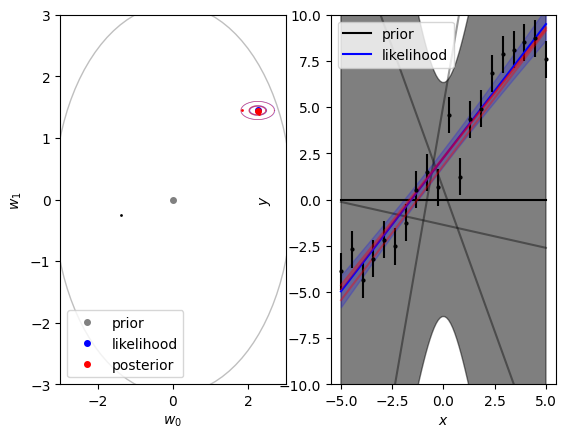

In [49]:
fig, axs = plt.subplots(1, 2)

ax = axs[0]
ax.plot(prior.mu[0], prior.mu[1], "o", color="gray", ms=4, label="prior")
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

circle = jnp.linspace(0, 2 * jnp.pi, 100)
circle = jnp.stack([jnp.cos(circle), jnp.sin(circle)], axis=1)
prior_cov = prior.L @ circle.T
for i in range(1, 3):
    ax.plot(
        prior.mu[0] + i * prior_cov[0, :],
        prior.mu[1] + i * prior_cov[1, :],
        color="gray",
        alpha=0.5,
        linewidth=1 / i,
    )

ax.plot(
    w_samples[:, 0],
    w_samples[:, 1],
    "o",
    color="black",
    ms=2,
    alpha=1.0,
    mec="none",
)

likelihood_cov = likelihood.L @ circle.T
ax.plot(
    likelihood.mu[0],
    likelihood.mu[1],
    "o",
    color="blue",
    ms=4,
    label="likelihood",
)
for i in range(1, 3):
    ax.plot(
        likelihood.mu[0] + i * likelihood_cov[0, :],
        likelihood.mu[1] + i * likelihood_cov[1, :],
        color="blue",
        alpha=0.5,
        linewidth=1 / i,
    )

ax.plot(
    posterior.mu[0],
    posterior.mu[1],
    "o",
    color="red",
    ms=4,
    label="posterior",
)
posterior_cov = posterior.L @ circle.T
for i in range(1, 3):
    ax.plot(
        posterior.mu[0] + i * posterior_cov[0, :],
        posterior.mu[1] + i * posterior_cov[1, :],
        color="red",
        alpha=0.5,
        linewidth=1 / i,
    )

w_post = posterior.sample(key, num_samples=3)
ax.plot(w_post[:, 0], w_post[:, 1], "o", color="red", ms=2, alpha=1.0, mec="none")


ax.set_xlabel("$w_0$")
ax.set_ylabel("$w_1$")

ax.legend(loc="lower left")

ax = axs[1]
ax.errorbar(
    X_train,
    Y_train,
    yerr=sigma_noise * jnp.ones_like(Y_train),
    fmt="o",
    ms=2,
    color="black",
)
ax.plot(x, f_prior.mu, color="black", label="prior")
ax.fill_between(
    x[:, 0],
    f_prior.mu - 2 * std_f,
    f_prior.mu + 2 * std_f,
    color="black",
    alpha=0.5,
)
ax.plot(x, phi(x) @ w_samples.T, color="black", alpha=0.4)


likelihood_x = phi(x) @ likelihood
ax.plot(x, likelihood_x.mu, color="blue", label="likelihood")
ax.fill_between(
    x[:, 0],
    likelihood_x.mu - 2 * likelihood_x.std,
    likelihood_x.mu + 2 * likelihood_x.std,
    color="blue",
    alpha=0.2,
)

# ax.plot(x, f_posterior.mu, color="red", label="posterior")
# ax.fill_between(
#     x[:, 0],
#     f_posterior.mu - 2 * f_posterior.std,
#     f_posterior.mu + 2 * f_posterior.std,
#     color="red",
#     alpha=0.5,
# )

ax.plot(x, phi(x) @ posterior.sample(key, num_samples=3).T, color="red", alpha=0.4)


ax.set_ylim([-10, 10])
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.legend(loc="upper left")


In [23]:
import plotly.graph_objs as go

# Convert to numpy for Plotly
x_np = np.array(x).flatten()
likelihood_mu_np = np.array(likelihood_x.mu).flatten()
likelihood_std_np = np.array(likelihood_x.std).flatten()

# Likelihood mean line
likelihood_mean_trace = go.Scatter(
    x=x_np,
    y=likelihood_mu_np,
    mode="lines",
    name="Likelihood Mean",
    line=dict(color="blue"),
)

# Uncertainty band (+/- 2 stddev)
likelihood_upper = likelihood_mu_np + 2 * likelihood_std_np
likelihood_lower = likelihood_mu_np - 2 * likelihood_std_np

likelihood_uncertainty_trace = go.Scatter(
    x=np.concatenate([x_np, x_np[::-1]]),
    y=np.concatenate([likelihood_upper, likelihood_lower[::-1]]),
    fill="toself",
    fillcolor="rgba(0,0,255,0.2)",
    line=dict(color="rgba(255,255,255,0)"),
    hoverinfo="skip",
    showlegend=True,
    name="Likelihood ±2σ",
)

layout = go.Layout(
    title="Likelihood Mean and Uncertainty Band",
    xaxis=dict(title="$x$"),
    yaxis=dict(title="$y$"),
    legend=dict(x=0.01, y=0.99),
    width=900,
    height=550,
)

fig = go.Figure(
    data=[likelihood_mean_trace, likelihood_uncertainty_trace], layout=layout
)
fig.show()